This workbook now tries to inspect some correlation from the features and see if some columns can be summarized 

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score

from sklearn import preprocessing

In [2]:
df = pd.read_csv("../train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

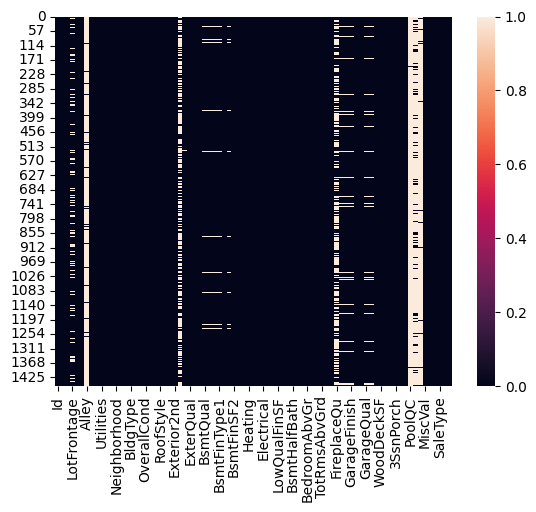

In [4]:
sns.heatmap(df.isnull())

Check the correlation

<Axes: xlabel='LotFrontage', ylabel='LotArea'>

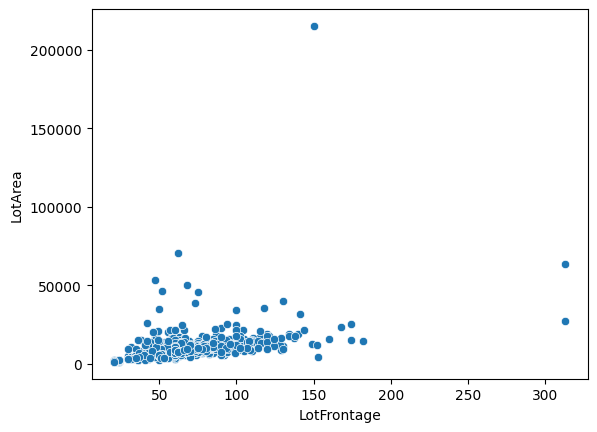

In [5]:
sns.scatterplot(data=df, x='LotFrontage', y='LotArea')

Try to apply linear regression into finding the suitable values

In [6]:
# dfLot = df[["LotFrontage", "LotArea"]]

df2 = df.copy()
df2 = df[~((df["LotArea"] > 45000) & (df["LotFrontage"] < 150))]
df2 = df2[["LotFrontage", "LotArea"]]
df2 = df2.dropna()
# df2.drop(df.query("LotArea > 45000 and LotFrontage < 150"))

X = df2["LotArea"].values.reshape(-1,1)
# LotFrontage has missing values (target value)
Y = df2["LotFrontage"]

# Remove outliers that I see visually
LotX_train, LotX_test, Loty_Train, Loty_Test = train_test_split(X, Y, test_size=0.2)

# LotX_train = LotX_train.values.reshape(-1, 1)
Loty_Train = Loty_Train.values.reshape(-1,1)

In [7]:
regrLot = linear_model.LinearRegression()

regrLot.fit(LotX_train, Loty_Train)

LinearRegression()

In [8]:
Loty_Pred = regrLot.predict(LotX_test)

In [9]:
mean_squared_error(Loty_Test, Loty_Pred)

463.00147393337124

In [10]:
df[((df["LotArea"] > 45000) & (df["LotFrontage"] < 150))][["LotFrontage", "LotArea"]]

,LotFrontage,LotArea
53,68.0,50271
451,62.0,70761
661,52.0,46589
769,47.0,53504
848,75.0,45600


In [11]:
dfPred =  df[((df["LotArea"] > 45000) & (df["LotFrontage"] < 150))]['LotArea'].apply(lambda x: regrLot.predict([[x]]).flatten()[0].round())
condition = (df["LotArea"] > 45000) & (df["LotFrontage"] < 150)
df.loc[condition, 'LotFrontage'] = dfPred

In [12]:
dfPred

53     121.0
451    147.0
661    116.0
769    125.0
848    115.0
Name: LotArea, dtype: float64

In [13]:
df[((df["LotArea"] > 45000) & (df["LotFrontage"] < 150))][["LotFrontage", "LotArea"]]

,LotFrontage,LotArea
53,121.0,50271
451,147.0,70761
661,116.0,46589
769,125.0,53504
848,115.0,45600


In [14]:
dfPredNA = df[df['LotFrontage'].isna()]['LotArea'].apply(lambda x: regrLot.predict([[x]]).flatten()[0].round())
df.loc[df['LotFrontage'].isna(), 'LotFrontage'] = dfPredNA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [17]:
df['Alley'].fillna("NoInfo", inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

There is no direct correlation between MasVnrType and MasVnrArea

<Axes: xlabel='MasVnrType', ylabel='MasVnrArea'>

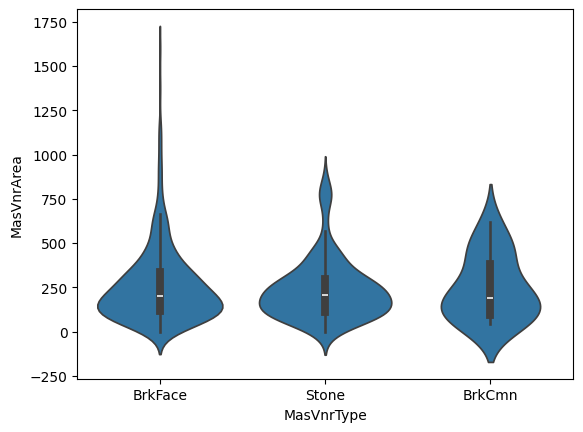

In [20]:
sns.violinplot(x='MasVnrType', y='MasVnrArea', data=df)
# plt.title('Distribution of Values by Category')
# plt.show()

In [21]:
df2 = df.copy()
dropColumns = []
for col in df2.columns:
    # print(df2[col].isna().sum() / df.shape[0]* 100)
    if df2[col].isna().sum() / df.shape[0]* 100 > 50:
        print(col)
        df2 = df2.drop(columns=col)
        dropColumns.append(col)
        
df2

MasVnrType
PoolQC
Fence
MiscFeature


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoInfo,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoInfo,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoInfo,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoInfo,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoInfo,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NoInfo,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NoInfo,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NoInfo,Reg,Lvl,AllPub,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NoInfo,Reg,Lvl,AllPub,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df2["MasVnrArea"] = df2["MasVnrArea"].fillna(0)

In [24]:
df2['FireplaceQu'] =  df2['FireplaceQu'].fillna("")

In [25]:
df2["BsmtQual"] = df2["BsmtQual"].fillna(df2["BsmtQual"].mode().to_string()) 
df2["BsmtCond"] = df2["BsmtCond"].fillna(df2["BsmtCond"].mode().to_string()) 
df2["BsmtExposure"] = df2["BsmtExposure"].fillna(df2["BsmtExposure"].mode().to_string()) 
df2["BsmtFinType1"] = df2["BsmtFinType1"].fillna(df2["BsmtFinType1"].mode().to_string())
df2["BsmtFinType2"] = df2["BsmtFinType2"].fillna(df2["BsmtFinType2"].mode().to_string()) 

In [26]:
df2['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [27]:
df2["Electrical"].fillna("SBrkr")

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [28]:
df2['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

<Axes: xlabel='GarageArea', ylabel='GarageCars'>

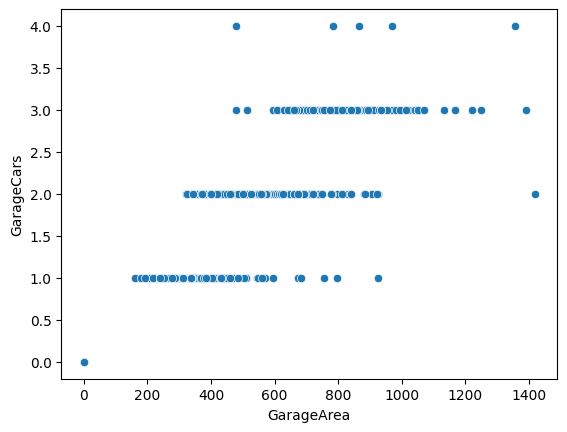

In [29]:
sns.scatterplot(data=df2, x='GarageArea', y='GarageCars')

In [30]:
regrGarage = linear_model.LinearRegression()

dfGarageNoNull = df2[['GarageArea', 'GarageCars']]
dfGarageNoNull = dfGarageNoNull.dropna()
regrGarage.fit([dfGarageNoNull['GarageArea']], [dfGarageNoNull['GarageCars']])

LinearRegression()

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
df2['GarageFinish'].value_counts()


GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [42]:
df3 = df2.copy()

df3 = df3.drop(columns=["GarageType", "GarageYrBlt", "GarageQual", "GarageCond", "GarageFinish"])

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
df3.select_dtypes(include='object').columns

df4 = df3.copy()

labelEncoder = preprocessing.LabelEncoder()

for col in df3.select_dtypes(include='object'):
    df4[col] = labelEncoder.fit_transform(df3[col])

# Non-object columns but the numbers are categorical
df4['MSSubClass'] = labelEncoder.fit_transform(df3['MSSubClass'])

In [45]:
df4

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,1,3,3,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,0,3,80.0,9600,1,1,3,3,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,5,3,68.0,11250,1,1,0,3,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,6,3,60.0,9550,1,1,0,3,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,5,3,84.0,14260,1,1,0,3,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,5,3,62.0,7917,1,1,3,3,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,0,3,85.0,13175,1,1,3,3,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,6,3,66.0,9042,1,1,3,3,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,0,3,68.0,9717,1,1,3,3,0,...,112,0,0,0,0,4,2010,8,4,142125


In [46]:
Y = df4["SalePrice"]
X = df4.drop(columns="SalePrice")

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [51]:
Y_pred = lr.predict(X_test)

mean_squared_error(y_test, Y_pred)

1094472190.4514074

Develop results for submission

In [53]:
dfTest = pd.read_csv("../test.csv")
dfTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<Axes: >

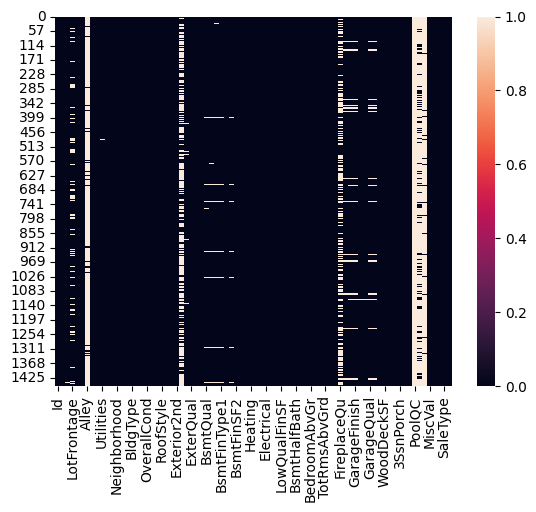

In [54]:
sns.heatmap(dfTest.isnull())

In [69]:
dropColumns

['MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [65]:
dfTest2 = dfTest.copy()

for col in dropColumns:
    dfTest2 = dfTest2.drop(columns=col)
    

In [66]:
dfPred =  dfTest2[((df["LotArea"] > 45000) & (dfTest2["LotFrontage"] < 150))]['LotArea'].apply(lambda x: regrLot.predict([[x]]).flatten()[0].round())
condition = (dfTest2["LotArea"] > 45000) & (dfTest2["LotFrontage"] < 150)
dfTest2.loc[condition, 'LotFrontage'] = dfPred

C:\Users\mshaf\AppData\Local\Temp\ipykernel_23840\3083553719.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfPred =  dfTest2[((df["LotArea"] > 45000) & (dfTest2["LotFrontage"] < 150))]['LotArea'].apply(lambda x: regrLot.predict([[x]]).flatten()[0].round())


In [67]:
dfPredNA = dfTest2[dfTest2['LotFrontage'].isna()]['LotArea'].apply(lambda x: regrLot.predict([[x]]).flatten()[0].round())
dfTest2.loc[dfTest2['LotFrontage'].isna(), 'LotFrontage'] = dfPredNA

In [68]:
for col in dfTest2.columns:
    if dfTest2[col].isnull().sum()>0:
        print(col,'->',(dfTest2[col].isnull().sum()/dfTest2.shape[0])*100)

MSZoning -> 0.2741603838245374
Alley -> 92.66620973269363
Utilities -> 0.1370801919122687
Exterior1st -> 0.06854009595613435
Exterior2nd -> 0.06854009595613435
MasVnrArea -> 1.0281014393420151
BsmtQual -> 3.015764222069911
BsmtCond -> 3.0843043180260454
BsmtExposure -> 3.015764222069911
BsmtFinType1 -> 2.878684030157642
BsmtFinSF1 -> 0.06854009595613435
BsmtFinType2 -> 2.878684030157642
BsmtFinSF2 -> 0.06854009595613435
BsmtUnfSF -> 0.06854009595613435
TotalBsmtSF -> 0.06854009595613435
BsmtFullBath -> 0.1370801919122687
BsmtHalfBath -> 0.1370801919122687
KitchenQual -> 0.06854009595613435
Functional -> 0.1370801919122687
FireplaceQu -> 50.03427004797807
GarageType -> 5.20904729266621
GarageYrBlt -> 5.346127484578479
GarageFinish -> 5.346127484578479
GarageCars -> 0.06854009595613435
GarageArea -> 0.06854009595613435
GarageQual -> 5.346127484578479
GarageCond -> 5.346127484578479
SaleType -> 0.06854009595613435


In [70]:
dfTest2['Alley'].fillna("NoInfo", inplace=True)

In [92]:
combination_counts = dfTest2.groupby(['MSZoning', 'MSSubClass']).size().reset_index(name='Count')
combination_counts[combination_counts["MSZoning"] == "FV"]


,MSZoning,MSSubClass,Count
5,FV,20,21
6,FV,60,18
7,FV,120,14
8,FV,160,21


In [71]:
dfTest2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

OHE of MasVnrType and FireplaceQu

In [201]:
dfTest2 = pd.concat([dfTest2, pd.get_dummies(dfTest2[["MasVnrType", "FireplaceQu"]], dtype=int)], axis=1)
dfTest2.drop(columns=["MasVnrType", "FireplaceQu"], inplace=True)

In [202]:
dfTest2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1459 non-null   int64  
 1   MSSubClass          1459 non-null   int64  
 2   MSZoning            1455 non-null   object 
 3   LotFrontage         1232 non-null   float64
 4   LotArea             1459 non-null   int64  
 5   Street              1459 non-null   object 
 6   LotShape            1459 non-null   object 
 7   LandContour         1459 non-null   object 
 8   Utilities           1457 non-null   object 
 9   LotConfig           1459 non-null   object 
 10  LandSlope           1459 non-null   object 
 11  Neighborhood        1459 non-null   object 
 12  Condition1          1459 non-null   object 
 13  Condition2          1459 non-null   object 
 14  BldgType            1459 non-null   object 
 15  HouseStyle          1459 non-null   object 
 16  Overal

In [ ]:
dfTest3 = dfTest2.copy()

dfTest3["MSZoning"] = dfTest2["MSZoning"].fillna(value=dfTest2["MSZoning"].mode().to_string()) 
dfTest3["LotFrontage"] = dfTest2["LotFrontage"].fillna(dfTest2["LotFrontage"].median()) 
dfTest3["Utilities"] = dfTest2["Utilities"].fillna("AllPub") 
dfTest3["Exterior1st"] = dfTest2["Exterior1st"].fillna(dfTest2["Exterior1st"].mode().to_string()) 
dfTest3["Exterior2nd"] = dfTest2["Exterior2nd"].fillna(dfTest2["Exterior2nd"].mode().to_string()) 
dfTest3["MasVnrArea"] = dfTest2["MasVnrArea"].fillna(dfTest2["MasVnrArea"].mean()) 
dfTest3["BsmtQual"] = dfTest2["BsmtQual"].fillna(dfTest2["BsmtQual"].mode().to_string()) 
dfTest3["BsmtCond"] = dfTest2["BsmtCond"].fillna(dfTest2["BsmtCond"].mode().to_string()) 
dfTest3["BsmtExposure"] = dfTest2["BsmtExposure"].fillna(dfTest2["BsmtExposure"].mode().to_string()) 
dfTest3["BsmtFinType1"] = dfTest2["BsmtFinType1"].fillna(dfTest2["BsmtFinType1"].mode().to_string()) 
dfTest3["BsmtFinSF1"] = dfTest2["BsmtFinSF1"].fillna(float(dfTest2["BsmtFinSF1"].mode())) 
dfTest3["BsmtFinType2"] = dfTest2["BsmtFinType2"].fillna(dfTest2["BsmtFinType2"].mode().to_string()) 
dfTest3["BsmtFinSF2"] = dfTest2["BsmtFinSF2"].fillna(float(dfTest2["BsmtFinSF2"].mode())) 
dfTest3["BsmtUnfSF"] = dfTest2["BsmtUnfSF"].fillna(float(dfTest2["BsmtUnfSF"].mode())) 
dfTest3["TotalBsmtSF"] = dfTest2["TotalBsmtSF"].fillna(float(dfTest2["TotalBsmtSF"].mode())) 
dfTest3["BsmtFullBath"] = dfTest2["BsmtFullBath"].fillna(float(dfTest2["BsmtFullBath"].mode())) 
dfTest3["BsmtHalfBath"] = dfTest2["BsmtHalfBath"].fillna(float(dfTest2["BsmtHalfBath"].mode())) 
dfTest3["KitchenQual"] = dfTest2["KitchenQual"].fillna(dfTest2["KitchenQual"].mode().to_string()) 
dfTest3["Functional"] = dfTest2["Functional"].fillna(dfTest2["Functional"].mode().to_string()) 
dfTest3["GarageType"] = dfTest2["GarageType"].fillna(dfTest2["GarageType"].mode().to_string()) 
dfTest3["GarageYrBlt"] = dfTest2["GarageYrBlt"].fillna(float(dfTest2["GarageYrBlt"].mode())) 
dfTest3["GarageFinish"] = dfTest2["GarageFinish"].fillna(dfTest2["GarageFinish"].mode().to_string()) 
dfTest3["GarageCars"] = dfTest2["GarageCars"].fillna(float(dfTest2["GarageCars"].mode())) 
dfTest3["GarageArea"] = dfTest2["GarageArea"].fillna(float(dfTest2["GarageCars"].mode())) 
dfTest3["GarageQual"] = dfTest2["GarageQual"].fillna(dfTest2["GarageQual"].mode().to_string()) 
dfTest3["GarageCond"] = dfTest2["GarageCond"].fillna(dfTest2["GarageCond"].mode().to_string()) 
dfTest3["SaleType"] = dfTest2["SaleType"].fillna(dfTest2["SaleType"].mode().to_string()) 



In [258]:
dfTest3['MSZoning'].count()

1459

In [264]:
count_id = dfTest3['Id'].count()

for c in dfTest3.columns:
    if dfTest3[col].count() < count_id:
        print(col)

In [285]:
dfTest3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1459 non-null   int64  
 1   MSSubClass          1459 non-null   int64  
 2   MSZoning            1459 non-null   object 
 3   LotFrontage         1459 non-null   float64
 4   LotArea             1459 non-null   int64  
 5   Street              1459 non-null   object 
 6   LotShape            1459 non-null   object 
 7   LandContour         1459 non-null   object 
 8   Utilities           1459 non-null   object 
 9   LotConfig           1459 non-null   object 
 10  LandSlope           1459 non-null   object 
 11  Neighborhood        1459 non-null   object 
 12  Condition1          1459 non-null   object 
 13  Condition2          1459 non-null   object 
 14  BldgType            1459 non-null   object 
 15  HouseStyle          1459 non-null   object 
 16  Overal

In [276]:
dfTest3.select_dtypes(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,0 Attchd,0 2005.0,0 Unf,0.0,0.0,0 TA,0 TA,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,0 Attchd,0 2005.0,0 Unf,0.0,0.0,0 TA,0 TA,Y,WD,Normal


In [299]:
dfTest3.select_dtypes(include='object').columns

dfTest4 = dfTest3.copy()

labelEncoder = preprocessing.LabelEncoder()

for col in dfTest3.select_dtypes(include='object'):
    # print(col)
    dfTest4[col] = labelEncoder.fit_transform(dfTest3[col])

# Non-object columns but the numbers are categorical
dfTest4['MSSubClass'] = labelEncoder.fit_transform(dfTest3['MSSubClass'])

In [300]:
dfTest4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1459 non-null   int64  
 1   MSSubClass          1459 non-null   int64  
 2   MSZoning            1459 non-null   int32  
 3   LotFrontage         1459 non-null   float64
 4   LotArea             1459 non-null   int64  
 5   Street              1459 non-null   int32  
 6   LotShape            1459 non-null   int32  
 7   LandContour         1459 non-null   int32  
 8   Utilities           1459 non-null   int32  
 9   LotConfig           1459 non-null   int32  
 10  LandSlope           1459 non-null   int32  
 11  Neighborhood        1459 non-null   int32  
 12  Condition1          1459 non-null   int32  
 13  Condition2          1459 non-null   int32  
 14  BldgType            1459 non-null   int32  
 15  HouseStyle          1459 non-null   int32  
 16  Overal

In [301]:
Y_pred = lr.predict(dfTest4)

In [302]:
Y_pred

array([ 91368.78775557, 138579.89064618, 151170.72148049, ...,
       126513.60182255,  67587.92857443, 228275.62082637])

In [308]:
submitDict = {'Id': dfTest4['Id'], 'SalePrice': Y_pred}

submitDf = pd.DataFrame(submitDict)
# submitDf['SalePrice'] = Y_pred
submitDf.to_csv('submit1.csv', index=False)

=========== First try before referring to forum: ===============

Feature Extraction

In [33]:
columnsOHE = list(df.columns[df.dtypes == "object"])
columnsOHE

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [34]:
columnsOHE.append("MSSubClass")
columnsOHE

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [35]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [36]:
df.describe(include=[object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [37]:
col_with_null_val = []
lenDf = len(df)

# for c in df.columns:
for c in columnsOHE:
    if df[c].count() != lenDf:
        col_with_null_val.append(c)
    
col_with_null_val

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [38]:
df1 = df.copy()
for col in col_with_null_val:
    df1[col] = df1[col].fillna("NoVal")

In [39]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,MnPrv,NoVal,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,4,2010,WD,Normal,142125


In [40]:
df.describe(include=[object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [41]:
df1.describe(include=[object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,NoVal,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NoVal,NoVal,NoVal,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [42]:
df1[df1.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NoVal,IR2,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,GdWo,NoVal,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,MnPrv,NoVal,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,30,RL,NaN,8854,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,5,2009,WD,Normal,121000
1446,1447,20,RL,NaN,26142,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,4,2010,WD,Normal,157900
1449,1450,180,RM,21.0,1533,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,9,2009,WD,Normal,136000


In [43]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoVal,IR1,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,MnPrv,NoVal,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NoVal,Reg,Lvl,AllPub,...,0,NoVal,NoVal,NoVal,0,4,2010,WD,Normal,142125


In [44]:
df2 = pd.concat([df1, pd.get_dummies(df1[columnsOHE], dtype=int)], axis=1)
df2 = df2.drop(columns=columnsOHE)
df2 = df2.dropna()

In [45]:
df2["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1121, dtype: int64

In [46]:
X = df2.drop(columns=["SalePrice", "Id"])
Y = df2["SalePrice"]

In [47]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1121, dtype: int64

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [49]:
rows_with_null = X_train[X_train.isnull().any(axis=1)]
rows_with_null

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


In [50]:
reg = linear_model.LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [51]:
Y_pred = reg.predict(X_test)

In [52]:
mean_squared_error(Y_test, Y_pred)

1162040210.1659148